# Projeto de Ciência dos Dados

#### Nome: Antonio Saporiti

## Introdução

Com o intuito de verificar o impacto do Mercado Comum do Sul (MERCOSUL) nos países que recém aderiram ao acordo, foram investigados dois fatores: capital estrangeiro recebido e o PIB. Desse modo, elaborou-se a pergunta: *Como os países pertencentes ao MERCOSUL reagem (economicamente) a "diminuição de investimentos externos"?*.
Essa diminuição de investimentos esperada se deve à lei da Tarifa Externa Comum, que assegura a proteção ao comércio intrabloco. Com isso, espera-se que os acordos economicos entre os países do bloco econômico sejam suficientes para garantir o crescimento do PIB, livrando-os da dependência de investimentos externos.

## Análises dos dados

### Importando as tabelas e bibliotecas

O programa importa os dados retirados do Gapminder, além de importar as bibliotecas necessárias

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

#capital estrangeiro para investimentos
capital_i = pd.read_excel('foreign_direct_investment_net_inflows_percent_of_gdp.xlsx')
#PIB
PIB = pd.read_excel("total_gni_ppp_current_international (1).xlsx")
#Observação: tabela usada p/ separar por região
region = pd.read_excel('landlocked_region.xlsx')

## Mudança de índices

alterando os índices das tabelas para poder juntá-las posteriormente.

In [73]:
capital_i_idx = capital_i.set_index('Country')
PIB_idx = PIB.set_index('Country')
region_idx = region.set_index('Country')

## Comparação dos países pertencentes ao MERCOSUL

Nesse bloco, os países pertencentes ao MERCOSUL serão subdividios em duas categorias, a primeira será dos países que formaram o bloco econômico e a segunda, dos países que aderiram posteriormente ao bloco. Agora, os países da América do Sul serão separados dos demais.

In [74]:
paises_am = region_idx[region_idx['region'] == 'america_south'].iloc[:,[0]]
paises_am

,region
Country,
Argentina,america_south
Bolivia,america_south
Brazil,america_south
Chile,america_south
Colombia,america_south
Ecuador,america_south
Guyana,america_south
Paraguay,america_south
Peru,america_south


## Categorizando os países

categorização dos países da América do Sul pertencentes ao MERCOSUL

In [75]:
mercosul_Estados_Partes = ["Argentina", "Brazil", "Paraguay", "Uruguay"]
mercosul_Estados_Associados = ["Bolivia", "Chile","Colombia","Ecuador", "Guyana","Peru","Suriname"]

In [76]:
paises_am.loc[:,"MERCOSUL_Estados_Partes"] = "não"
paises_am.loc[:,"MERCOSUL_Estados_Associados"] = "não"
paises_am.head(12)

,region,MERCOSUL_Estados_Partes,MERCOSUL_Estados_Associados
Country,,,
Argentina,america_south,não,não
Bolivia,america_south,não,não
Brazil,america_south,não,não
Chile,america_south,não,não
Colombia,america_south,não,não
Ecuador,america_south,não,não
Guyana,america_south,não,não
Paraguay,america_south,não,não
Peru,america_south,não,não


In [77]:
paises_am.loc[mercosul_Estados_Partes,"MERCOSUL_Estados_Partes"] = "sim"
paises_am.loc[mercosul_Estados_Associados,"MERCOSUL_Estados_Associados"] = "sim"
paises_am.head(12)

,region,MERCOSUL_Estados_Partes,MERCOSUL_Estados_Associados
Country,,,
Argentina,america_south,sim,não
Bolivia,america_south,não,sim
Brazil,america_south,sim,não
Chile,america_south,não,sim
Colombia,america_south,não,sim
Ecuador,america_south,não,sim
Guyana,america_south,não,sim
Paraguay,america_south,sim,não
Peru,america_south,não,sim


## Seleção do tempo

Os anos escolhidos apresentam um distanciamento de 10 anos (anteriores e posteriores) da ingressão de países como a Colombia (2003) e a Equador (2003)

In [78]:
capital_i_tempo = capital_i_idx.iloc[:, 26:43]
PIB_t = PIB_idx.iloc[:, 6:23]

## Junção dos Dados

Criando uma tabela que possui os dados dos países da america do sul.

In [79]:
capital = paises_am.join(capital_i_tempo, how = 'inner')

In [80]:
capital

,region,MERCOSUL_Estados_Partes,MERCOSUL_Estados_Associados,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
Country,,,,,,,,,,,,,,,,,,,,
Argentina,america_south,sim,não,2.550,3.130,2.440,8.460,3.670,0.806,2.200,1.290,2.510,2.6500,2.380,2.250,2.690,1.210,2.680,2.040,2.810
Bolivia,america_south,não,sim,6.410,9.220,11.200,12.200,8.770,8.670,8.560,2.440,0.746,-2.5000,2.450,2.790,3.070,2.440,3.170,3.580,3.910
Brazil,america_south,sim,não,1.320,2.220,3.690,4.770,5.030,4.150,3.270,1.810,2.720,1.7300,1.750,3.190,2.990,1.890,4.000,3.870,3.510
Chile,america_south,não,sim,6.170,6.210,5.670,11.700,6.240,5.920,3.660,5.320,6.850,6.0700,4.900,7.760,10.300,8.040,7.330,9.570,11.300
Colombia,america_south,não,sim,3.200,5.210,2.870,1.750,2.440,2.590,2.180,1.820,2.660,6.9800,4.150,4.280,4.330,3.440,2.240,4.370,4.070
Ecuador,america_south,não,sim,1.980,2.570,3.110,3.300,-0.128,2.200,2.740,2.690,2.290,1.1900,0.580,0.380,1.710,0.494,0.238,0.812,0.645
Guyana,america_south,não,sim,8.360,6.940,6.130,6.620,9.420,8.040,6.030,3.520,3.820,9.3100,7.020,8.760,9.260,7.960,8.710,9.580,9.710
Paraguay,america_south,sim,não,1.530,2.370,3.790,1.130,1.320,1.290,1.430,-0.876,1.170,0.0836,1.760,0.761,1.830,0.169,2.770,1.850,2.960
Peru,america_south,não,sim,6.280,3.680,2.960,3.870,1.560,2.200,3.940,2.270,2.390,3.3900,3.910,5.370,5.740,5.320,5.730,4.270,6.120


## Plotagem e análise do capital investido

Análise temporal do capital externo investido nos países pertencentes ao MERCOSUL 

Text(0, 0.5, 'Média do capital externo investido')

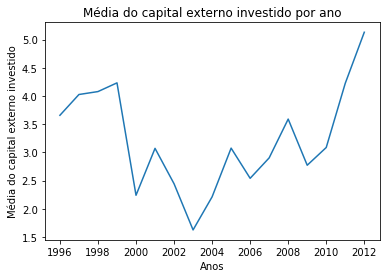

In [81]:
capital.iloc[:,3:].mean().plot()
plt.title("Média do capital externo investido por ano")
plt.xlabel("Anos")
plt.ylabel("Média do capital externo investido")

Nesse gráfico, percebe-se que no ano de 2003 os investimentos externos, de forma geral, caíram em relação aos outros anos. Esse fator corrobora a influência da TEC nos países recem chegados ao bloco, causando uma redução de investimentos estrangeiros na América do Sul. No entanto, a média nos anos seguintes tende a aumentar, comprometendo a autossuficiência do bloco.

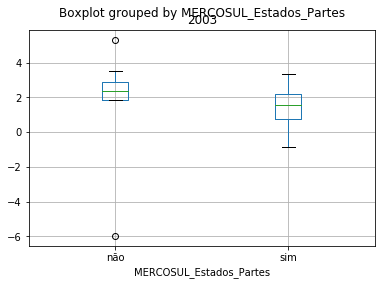

In [82]:
capital.boxplot(column=2003, by="MERCOSUL_Estados_Partes")

Para as plotagens acima, é possível depreender que houve uma acentuação da política protecionista intrabloco, na qual Estados Partes estabelecem a Tarifa Externa Comum, diminuindo os investimentos externos. A título de exemplo, no boxplot é possível observar uma homogeneidade maior entre os investimentos externos recebidos pelos países no ano de 2003.

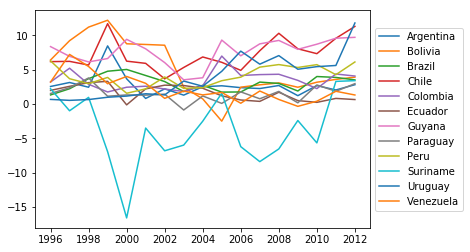

In [83]:
capital.transpose().iloc[3:].plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

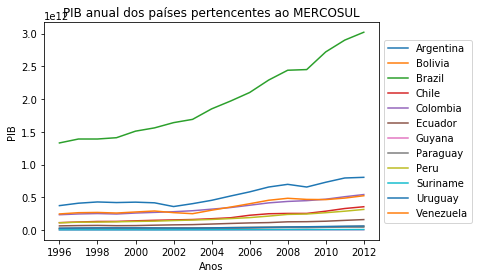

In [84]:
pib = paises_am.join(PIB_t, how = "inner")
pib.transpose().iloc[3:].plot()
plt.title("PIB anual dos países pertencentes ao MERCOSUL")
plt.xlabel("Anos")
plt.ylabel("PIB")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Análise do capital externo investido X PIB

A partir de agora, serão comparados países fora do bloco ecônomico, com PIBs parecidos, com
o intuito de analisar o cenário global de investimentos externos.

In [85]:
mercosul = ["Argentina", "Paraguay", "Uruguay", "Bolivia", "Chile","Colombia","Ecuador", "Guyana","Peru","Suriname"]
selecionado = ["Australia", "Austria", "Poland", "Mexico", "Egypt", "South Africa", "Switzerland", "Netherlands","Belgium"]
PIB_t.loc[:, "MERCOSUL"] = "não pertence"
PIB_t.loc[:, "Selecionado"] = "não"
PIB_t.loc[mercosul,'MERCOSUL'] = "pertence"
PIB_t.loc[selecionado,'Selecionado'] = "sim"
PIB_global = PIB_t[PIB_t['Selecionado'] == "sim"]

In [86]:
capital_i_tempo.loc[:, "MERCOSUL"] = "não pertence"
capital_i_tempo.loc[:, "Selecionado"] = "não"
capital_i_tempo.loc[mercosul, "MERCOSUL"] = "pertence"
capital_i_tempo.loc[selecionado,'Selecionado'] = "sim"
capital_i_global = capital_i_tempo[capital_i_tempo['Selecionado'] == 'sim']

### Montagem dos gráficos

Agora serão montadas os gráficos para validação final da hipótese.

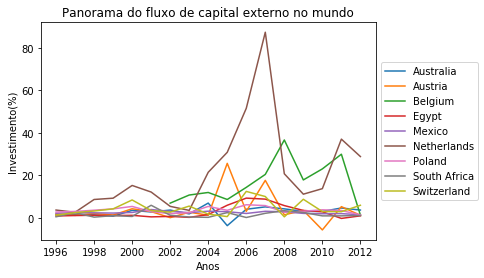

In [87]:
capital_i_global.iloc[:,0:17].transpose().plot()
plt.title("Panorama do fluxo de capital externo no mundo")
plt.xlabel("Anos")
plt.ylabel("Investimento(%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

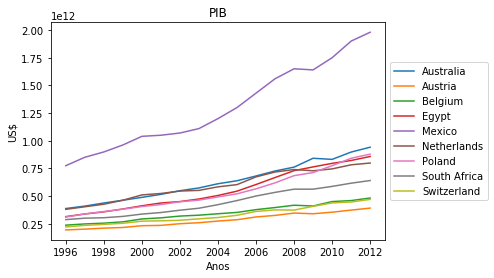

In [88]:
PIB_global.iloc[:,0:17].transpose().plot()
plt.title("PIB")
plt.xlabel("Anos")
plt.ylabel("US$")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Conclusão

Retomando a ideia da pergunta feita na Introdução e assimilando os dados obtidos, é possível concluir que ainda há uma instabilidade nas relações economicas dentro do Mercosul, ou seja, os países não são capazes de se desvencilhar do apoio externo. Com base nos gráficos expostos acerca dos países que ingressaram no ano de 2003, percebe-se que há uma redução do auxílio externo momentânea, mas com o passar do tempo, esse auxílio retorna. 
Com os resultados plotados dos países que estavam fora do acordo, foi possível traçar um panorama global, que, por sua vez, refletiu em uma certa estabilidade (tendendo a decair) do fluxo de investimentos externos e uma tendência de aumento global no PIB. Dessa forma, não foi possível concluir se o avanço no PIB dos países que ingressaram no bloco (e os que já estavam) decorreram exclusivamente dos acordos decorrentes do Mercosul ou se estes países apenas acompanharam a tendência global.